**I  recently learnt R and have done this simple visual analysis just for practice.  
(And also, because F1 is ❤)**

In [1]:
#Loading all the relevant packages
library(tidyverse) #for data manipulation
library(ggplot2) #for data viz
library(janitor) #for data cleaning
library(readxl) #readxl package is not part of the core tidyverse; hence explicitly loaded.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
#the data is in .xl file, hence this function is used here.
f1_data <- read_excel("../input/formula-one-complete-data-20062013/data.xlsx")

In [3]:
#cleaning the column headers for consistency.
#clean_names() replaces spaces with underscore, converts everything to lowercase.
f1_data <- clean_names(f1_data)


In [4]:
#checking for missing values
sum(is.na(f1_data))
#checking for duplicate rows
sum(duplicated(f1_data))

[1] 0

[1] 0

#### 1. Teams along with the number of seasons they competed in:

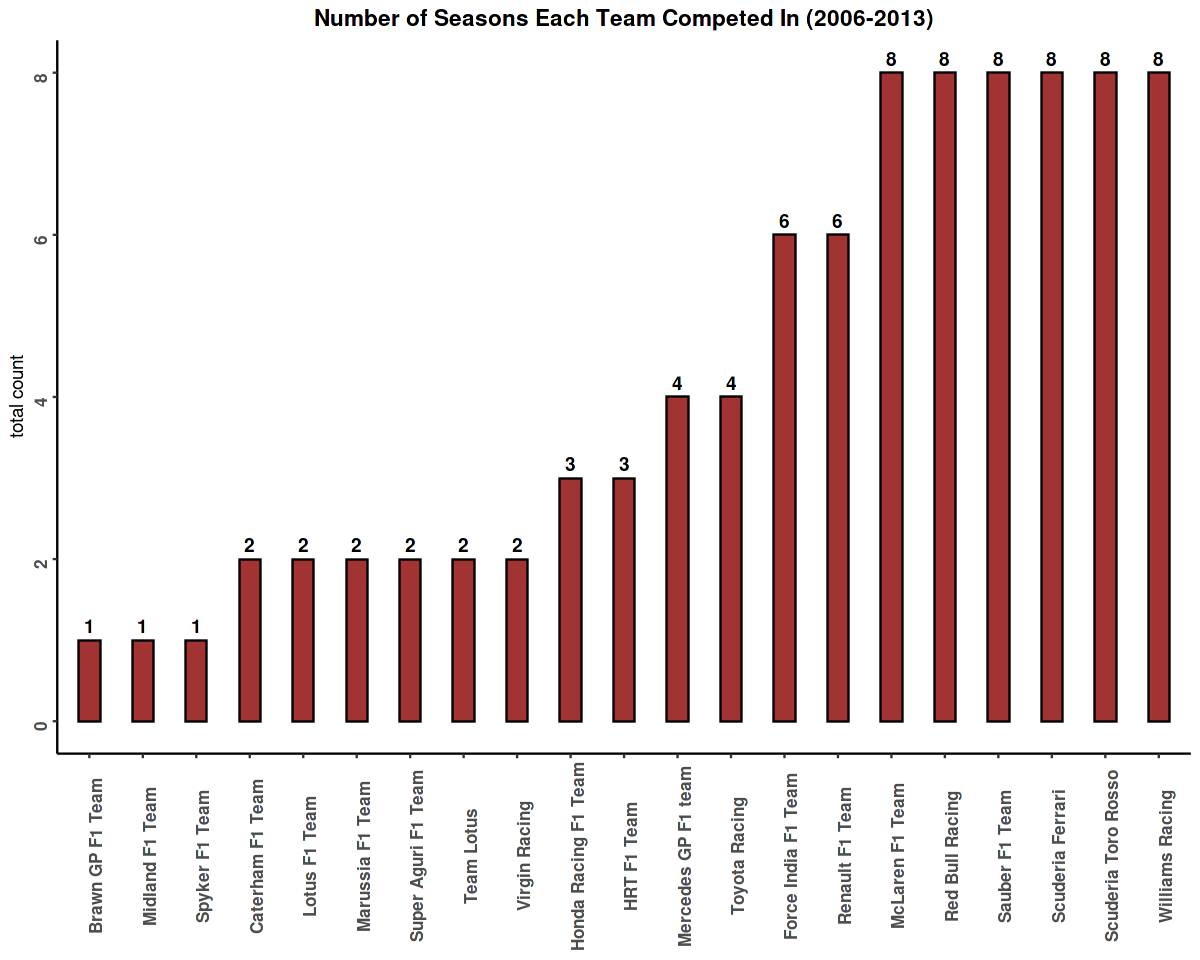

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
f1_data %>%
ggplot(aes(x=reorder(title,seasons),y=seasons)) +
geom_bar(stat="identity",width=0.4,color="black",alpha=0.8,fill="darkred") +
geom_text(aes(label=seasons),stat="identity",vjust=-0.5,color="black",fontface="bold")+
labs(title="Number of Seasons Each Team Competed In (2006-2013)",y="total count") +
theme_classic() +
theme(legend.position="none",axis.title.x=element_blank(),
     axis.text=element_text(face="bold",angle=90,size=10),
     plot.title=element_text(face="bold",hjust=0.5))

#### 2. Which teams scored points for fastest laps between 2006-2013?

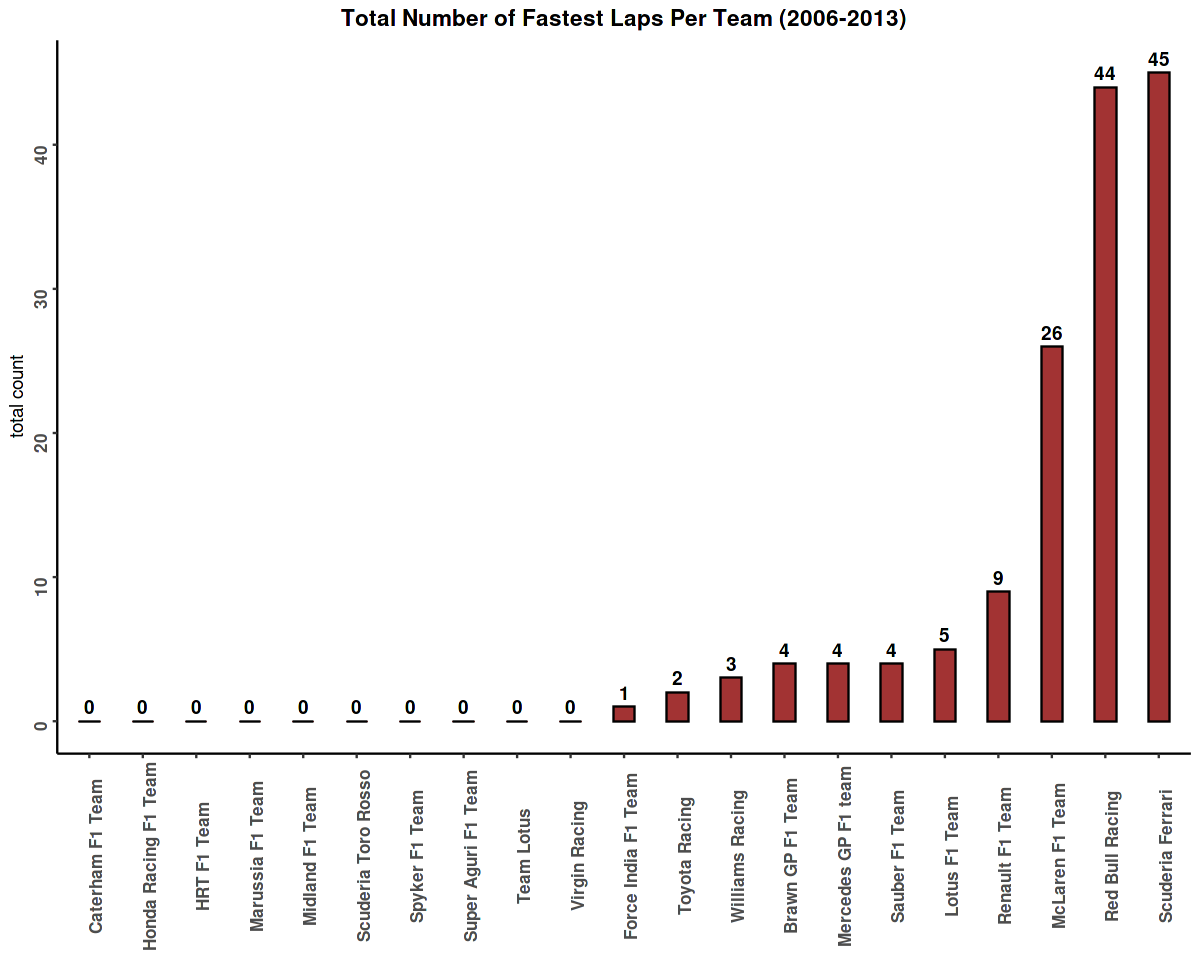

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
f1_data %>%
ggplot(aes(x=reorder(title,fastest_lap),y=fastest_lap)) +
geom_bar(stat="identity",width=0.4,color="black",alpha=0.8,fill="darkred") +
geom_text(aes(label=fastest_lap),stat="identity",vjust=-0.5,color="black",fontface="bold")+
labs(title="Total Number of Fastest Laps Per Team (2006-2013)",y="total count") +
theme_classic() +
theme(legend.position="none",axis.title.x=element_blank(),
     axis.text=element_text(face="bold",angle=90,size=10),
     plot.title=element_text(face="bold",hjust=0.5))

#### 3. How many pole positions did each team bag?

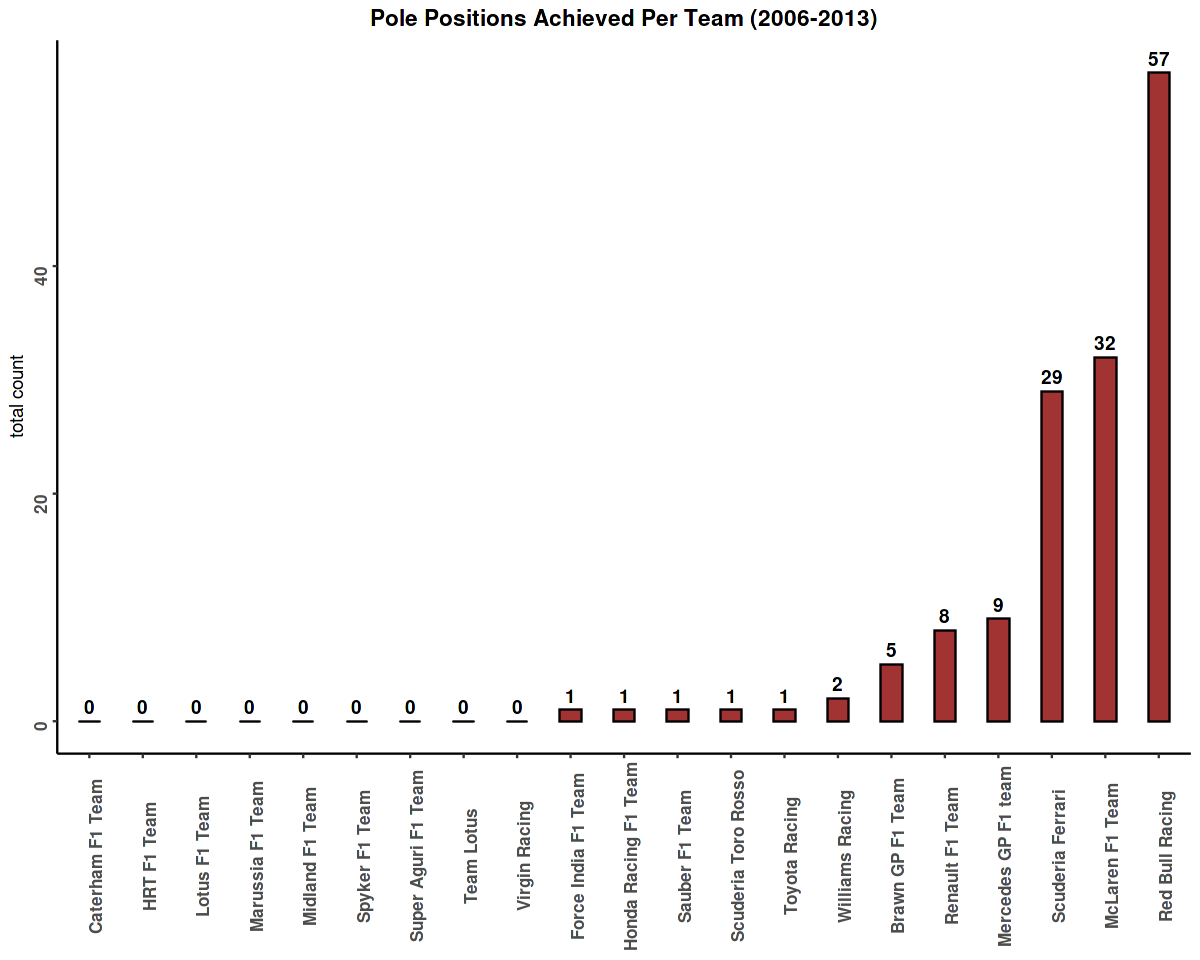

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)
f1_data %>%
ggplot(aes(x=reorder(title,pole_position),y=pole_position)) +
geom_bar(stat="identity",width=0.4,color="black",alpha=0.8,fill="darkred") +
geom_text(aes(label=pole_position),stat="identity",vjust=-0.5,color="black",fontface="bold")+
labs(title="Pole Positions Achieved Per Team (2006-2013)",y="total count") +
theme_classic() +
theme(legend.position="none",axis.title.x=element_blank(),
     axis.text=element_text(face="bold",angle=90,size=10),
     plot.title=element_text(face="bold",hjust=0.5))

#### 4. Number of podiums scored by each team:

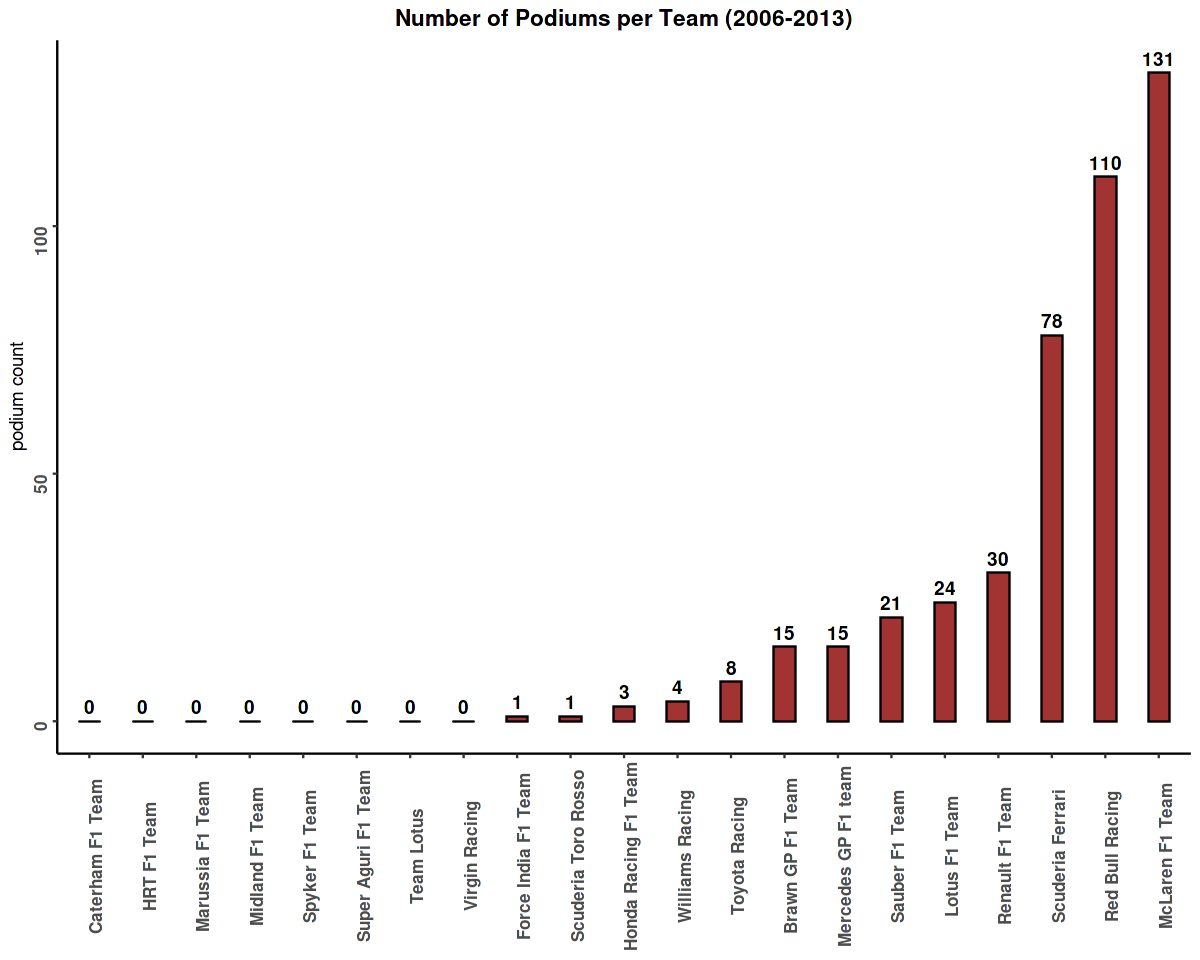

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8)
f1_data %>%
ggplot(aes(x=reorder(title,podium),y=podium)) +
geom_bar(stat="identity",width=0.4,color="black",alpha=0.8,fill="darkred") +
geom_text(aes(label=podium),stat="identity",vjust=-0.5,color="black",fontface="bold")+
labs(title="Number of Podiums per Team (2006-2013)",y="podium count") +
theme_classic() +
theme(legend.position="none",axis.title.x=element_blank(),
     axis.text=element_text(face="bold",angle=90,size=10),
     plot.title=element_text(face="bold",hjust=0.5))

#### 5. Which team won most of the Grands Prix?

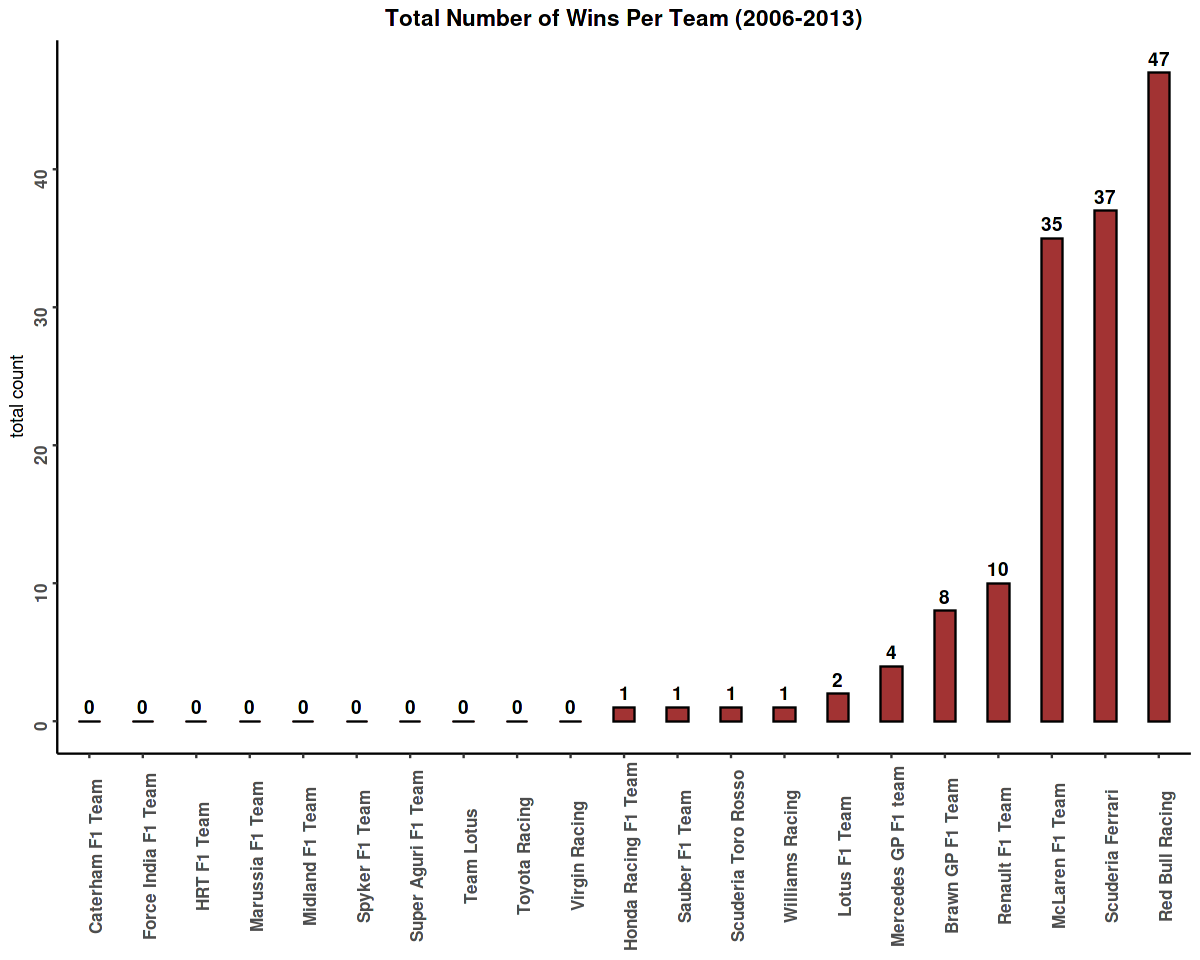

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8)
f1_data %>%
ggplot(aes(x=reorder(title,win),y=win)) +
geom_bar(stat="identity",width=0.4,color="black",alpha=0.8,fill="darkred") +
geom_text(aes(label=win),stat="identity",vjust=-0.5,color="black",fontface="bold")+
labs(title="Total Number of Wins Per Team (2006-2013)",y="total count") +
theme_classic() +
theme(legend.position="none",axis.title.x=element_blank(),
     axis.text=element_text(face="bold",angle=90,size=10),
     plot.title=element_text(face="bold",hjust=0.5))

#### 6. Aggregate points scored by each team between 2006-2013:

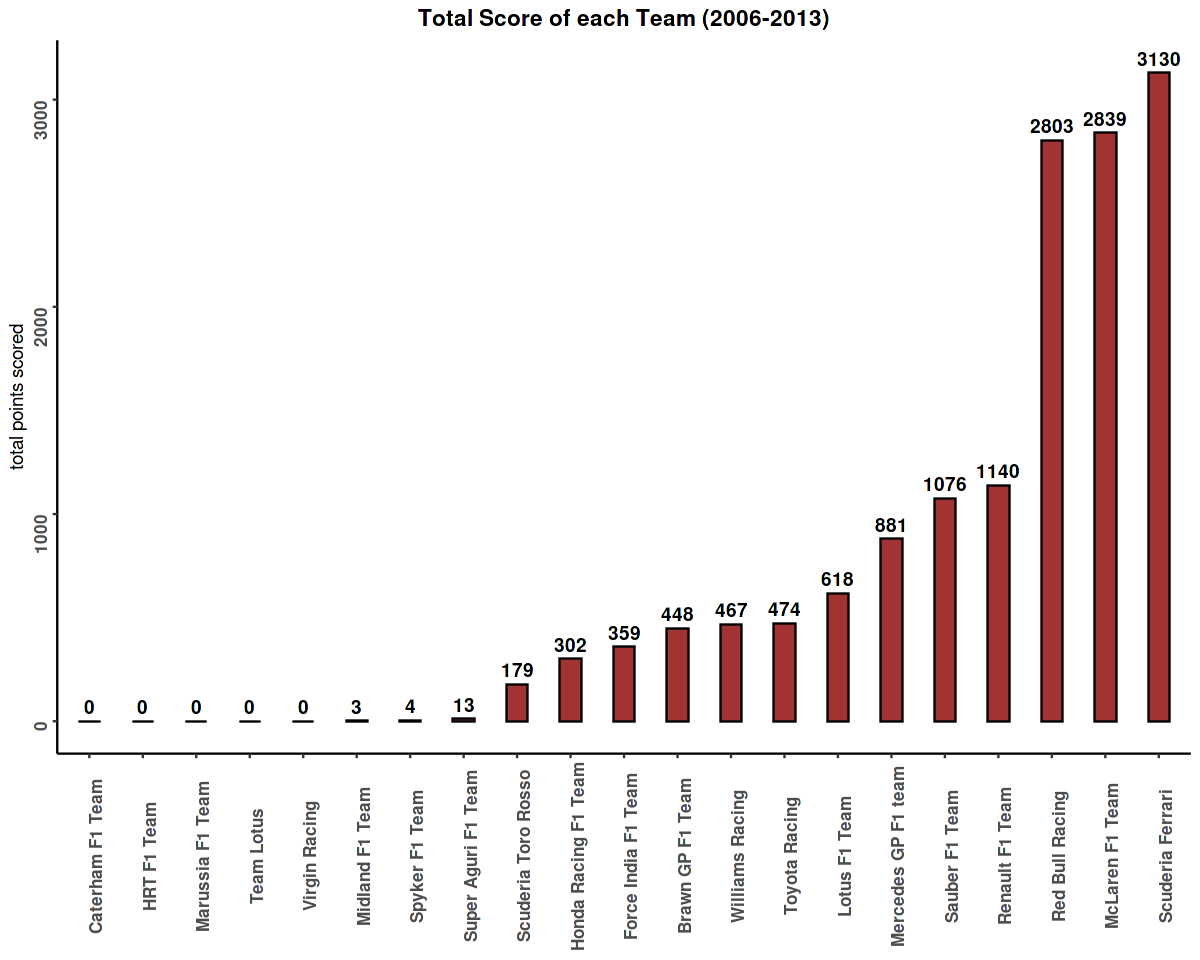

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)
f1_data %>%
ggplot(aes(x=reorder(title,points_scored),y=points_scored)) +
geom_bar(stat="identity",width=0.4,color="black",alpha=0.8,fill="darkred") +
geom_text(aes(label=points_scored),stat="identity",vjust=-0.5,color="black",fontface="bold")+
labs(title="Total Score of each Team (2006-2013)",y="total points scored") +
theme_classic() +
theme(legend.position="none",axis.title.x=element_blank(),
     axis.text=element_text(face="bold",angle=90,size=10),
     plot.title=element_text(face="bold",hjust=0.5))

#### 7. Which teams won most number of championships between 2006-2013 (8 years) ?

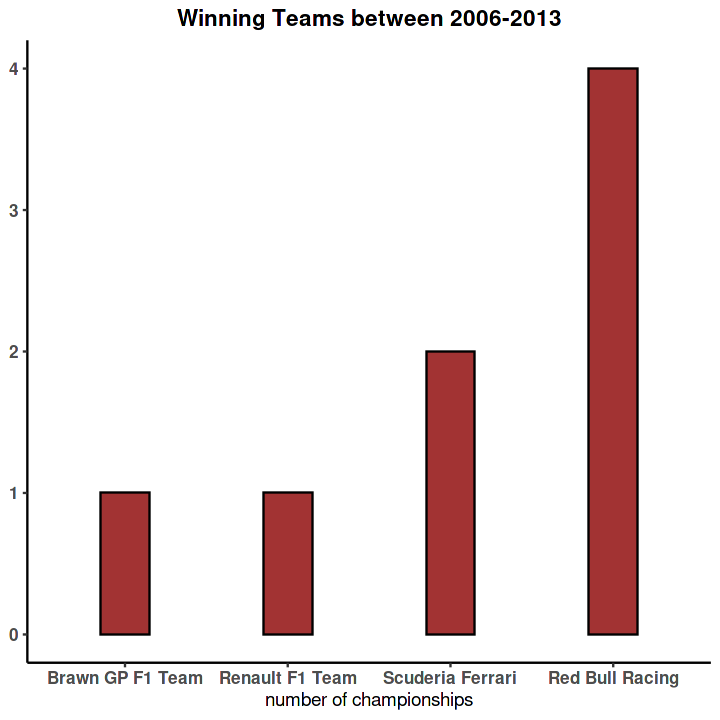

In [11]:
options(repr.plot.width = 6, repr.plot.height = 6)
f1_data %>%
filter(championships > 0) %>%
arrange(desc(championships)) %>%
ggplot(aes(y = championships, x=reorder(title,championships))) +
geom_bar(stat="identity", width=0.3,color="black",alpha=0.8,fill="darkred") +
labs(title="Winning Teams between 2006-2013",x="number of championships") +
theme_classic() +
theme(legend.position="none",
     axis.text=element_text(face="bold",size=10), axis.title.y=element_blank(),
     plot.title=element_text(hjust=0.5,face="bold"))
